In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./xAPI-Edu-Data.csv")
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
## Reading dataset general information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
# convert text data to numeric based on unique values
def convert_text_to_numeric(df):
    # make empty dataframe
    new_df = pd.DataFrame()
    for column in df.columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            print(unique_elements)
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
            new_df[column] = df[column]
    return df, new_df

df5_numeric, df_categorical = convert_text_to_numeric(data.copy())
df_categorical

{'F', 'M'}
{'Jordan', 'lebanon', 'Lybia', 'venzuela', 'Iran', 'Egypt', 'Syria', 'SaudiArabia', 'Morocco', 'USA', 'Tunis', 'Palestine', 'Iraq', 'KW'}
{'Jordan', 'lebanon', 'Lybia', 'venzuela', 'Iran', 'Egypt', 'Syria', 'SaudiArabia', 'Morocco', 'USA', 'Tunis', 'Palestine', 'Iraq', 'KuwaIT'}
{'HighSchool', 'MiddleSchool', 'lowerlevel'}
{'G-04', 'G-06', 'G-05', 'G-08', 'G-11', 'G-10', 'G-02', 'G-07', 'G-12', 'G-09'}
{'A', 'B', 'C'}
{'Geology', 'Spanish', 'Biology', 'Math', 'Science', 'Quran', 'French', 'English', 'Chemistry', 'History', 'Arabic', 'IT'}
{'F', 'S'}
{'Father', 'Mum'}
{'Yes', 'No'}
{'Bad', 'Good'}
{'Under-7', 'Above-7'}
{'M', 'H', 'L'}


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,13,13,2,0,0,11,0,0,0,1,0,0
1,1,13,13,2,0,0,11,0,0,0,1,0,0
2,1,13,13,2,0,0,11,0,0,1,0,1,2
3,1,13,13,2,0,0,11,0,0,1,0,1,2
4,1,13,13,2,0,0,11,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,1,3,0,8,1,0,1,0,1,2
476,0,0,0,1,3,0,0,0,0,1,0,0,0
477,0,0,0,1,3,0,0,1,0,1,0,0,0
478,0,0,0,1,3,0,9,0,0,1,0,1,2


In [70]:
numerical_colums = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
data_numeric = df5_numeric[numerical_colums]
data_categorical = df5_numeric.drop(numerical_colums, axis=1)
data_numeric.head()
data_categorical.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,13,13,2,0,0,11,0,0,0,1,0,0
1,1,13,13,2,0,0,11,0,0,0,1,0,0
2,1,13,13,2,0,0,11,0,0,1,0,1,2
3,1,13,13,2,0,0,11,0,0,1,0,1,2
4,1,13,13,2,0,0,11,0,0,1,0,1,0


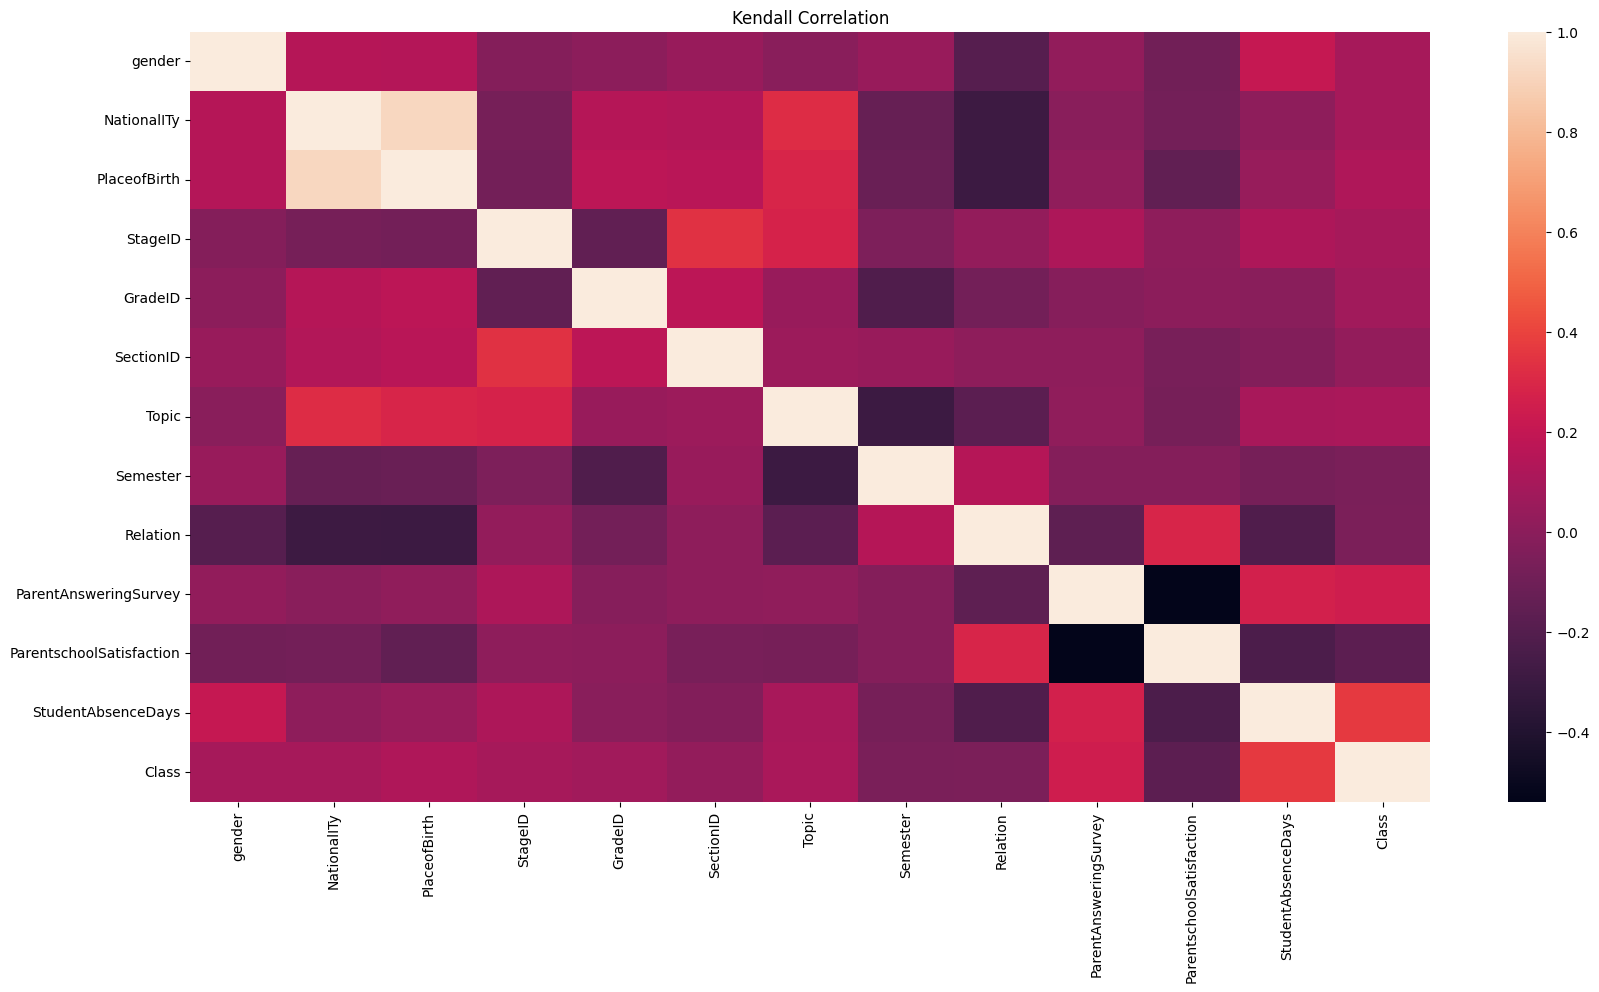

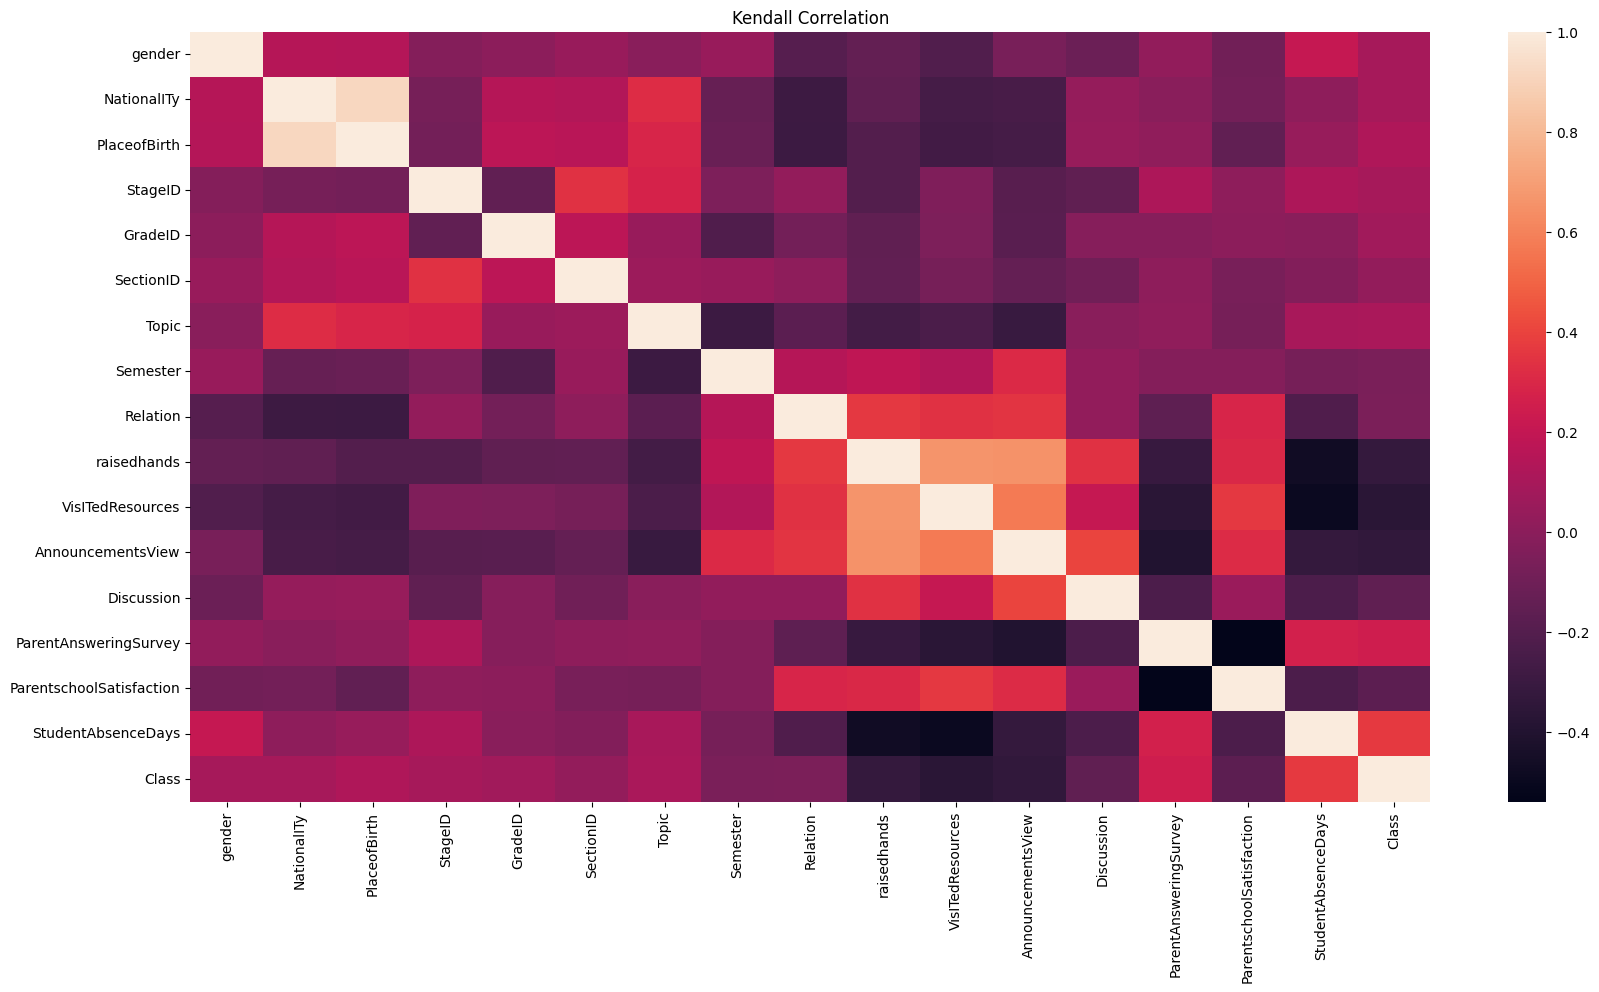

In [6]:
# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df_categorical.corr(method='spearman'))
plt.title('Kendall Correlation')
plt.show()

# plot kendall correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df5_numeric.corr(method='spearman'))
plt.title('Kendall Correlation')
plt.show()


/tmp/ipykernel_4466/2467891984.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numeric['raisedhands'], ax=ax[0, 0])
/tmp/ipykernel_4466/2467891984.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_numeric['VisITedResources'], ax=ax[0, 1])
/tmp/ipykernel_4466/2467891984.py:6: User

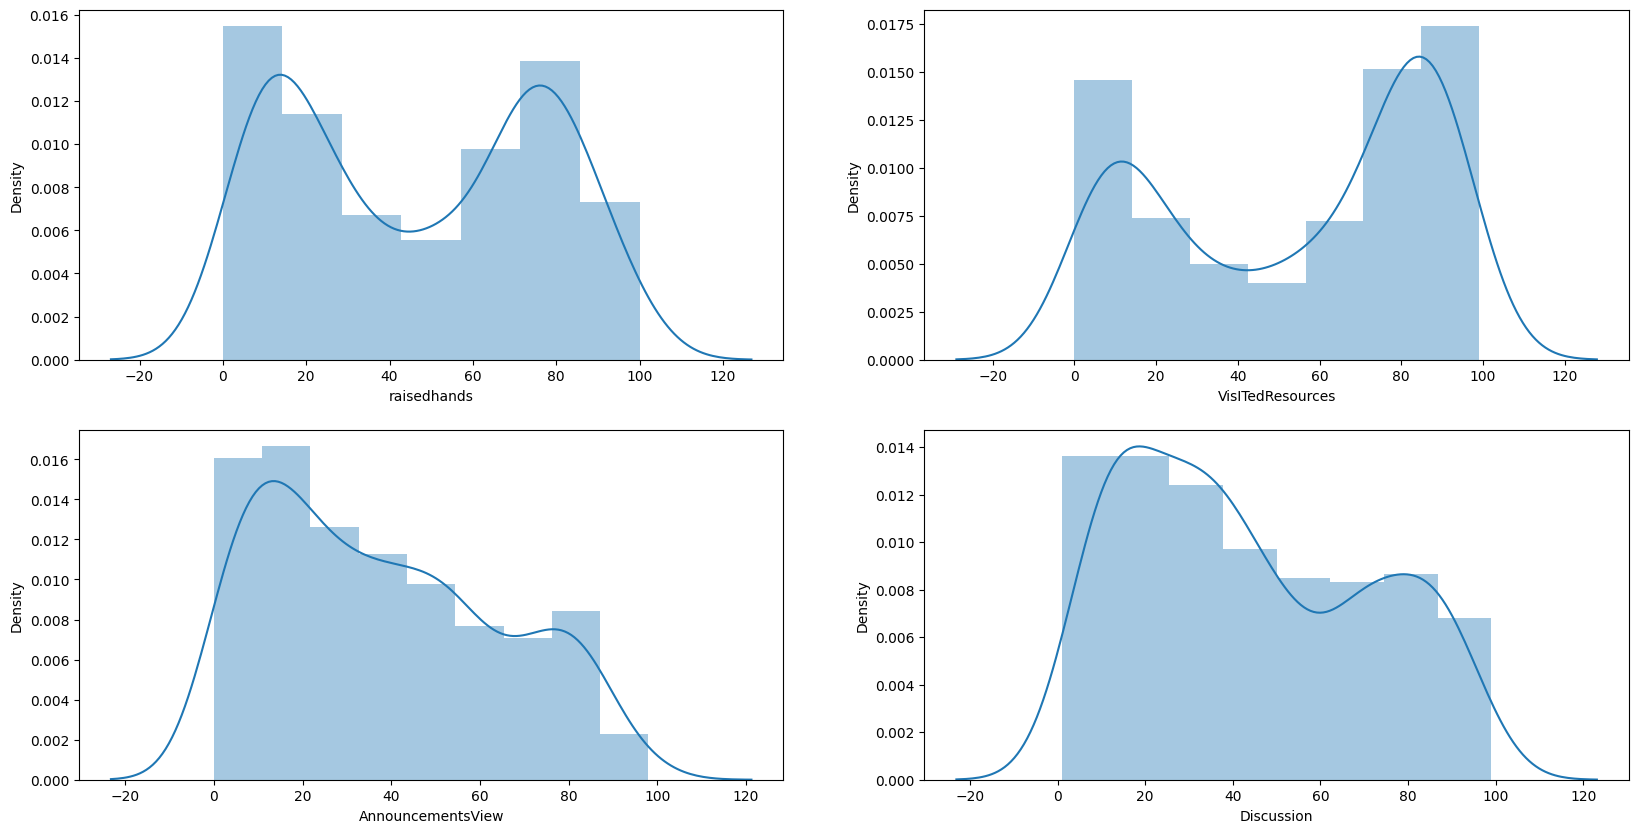

In [7]:
# plot histogram and probability density function

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(data_numeric['raisedhands'], ax=ax[0, 0])
sns.distplot(data_numeric['VisITedResources'], ax=ax[0, 1])
sns.distplot(data_numeric['AnnouncementsView'], ax=ax[1, 0])
sns.distplot(data_numeric['Discussion'], ax=ax[1, 1])
plt.show()

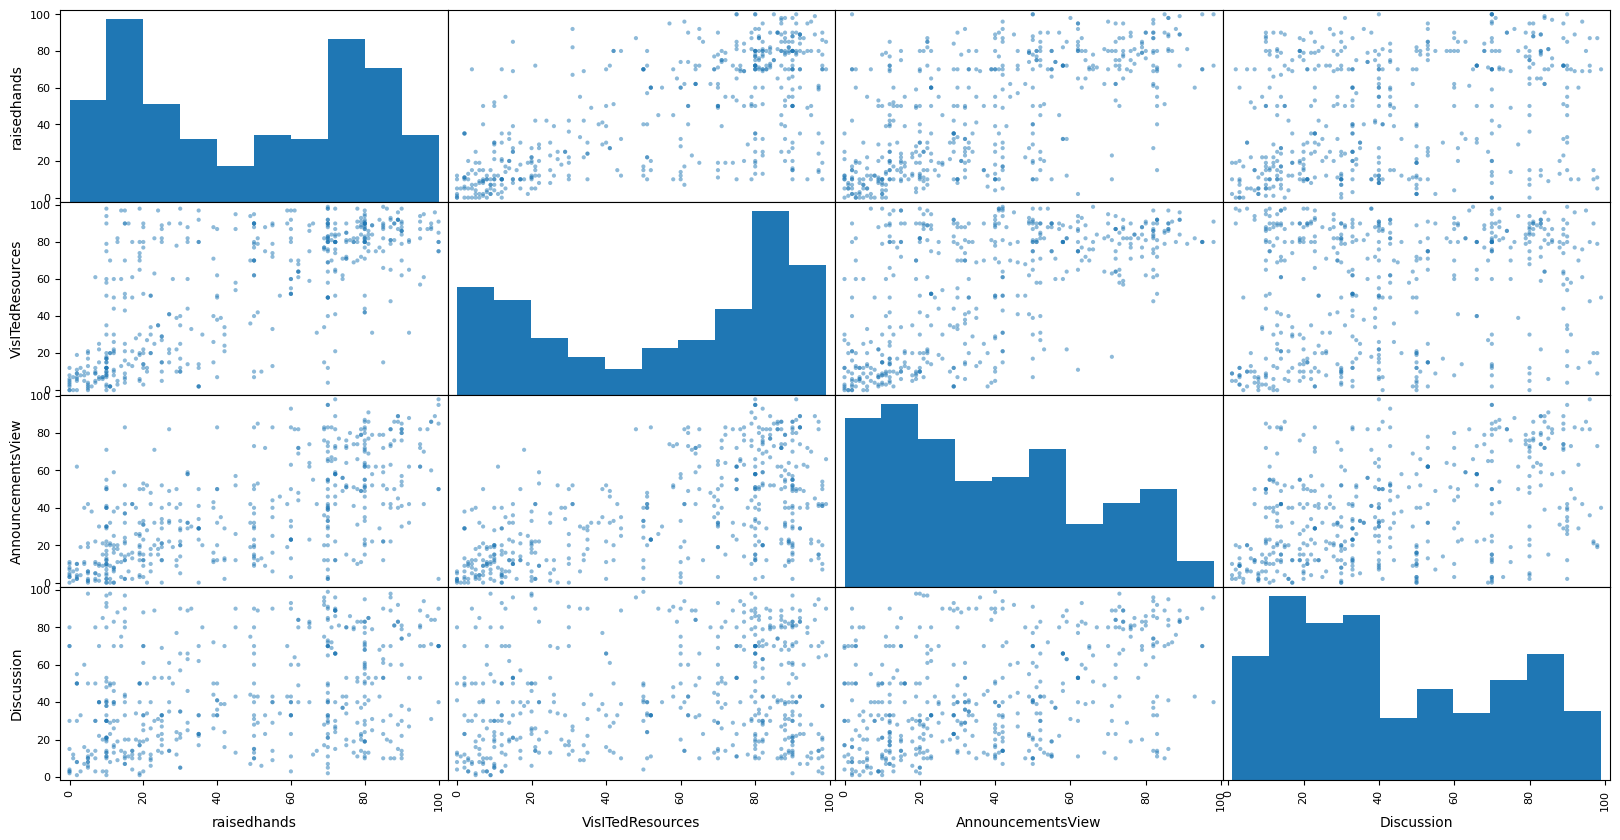

In [8]:
# scatter plot of numeric data
pd.plotting.scatter_matrix(data_numeric, figsize=(20, 10))
plt.show()

In [87]:
df5_numeric

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,13,13,2,0,0,11,0,0,15,16,2,20,0,1,0,0
1,1,13,13,2,0,0,11,0,0,20,20,3,25,0,1,0,0
2,1,13,13,2,0,0,11,0,0,10,7,0,30,1,0,1,2
3,1,13,13,2,0,0,11,0,0,30,25,5,35,1,0,1,2
4,1,13,13,2,0,0,11,0,0,40,50,12,50,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,1,3,0,8,1,0,5,4,5,8,1,0,1,2
476,0,0,0,1,3,0,0,0,0,50,77,14,28,1,0,0,0
477,0,0,0,1,3,0,0,1,0,55,74,25,29,1,0,0,0
478,0,0,0,1,3,0,9,0,0,30,17,14,57,1,0,1,2


In [88]:
# calculate cronbach alpha for all columns
import pingouin as pg

# calculate cronbach alpha for demographic data
data_cronbach = df5_numeric.copy()

# for demographic features
demographic_features = [ 'gender', 'NationalITy', 'PlaceofBirth']
# calculate cronbach alpha for demographic data
cronbach_alpha = pg.cronbach_alpha(data_cronbach[demographic_features])
print('Cronbach alpha for demographic features: ', cronbach_alpha)

# for academic background features
academic_features = ['StageID', 'GradeID', 'SectionID', 'Topic', 'Semester']
# calculate cronbach alpha for academic background data
cronbach_alpha = pg.cronbach_alpha(data_cronbach[academic_features])
print('Cronbach alpha for academic background features: ', cronbach_alpha)

# for behavioral features
behavioral_features = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
# calculate cronbach alpha for behavioral data
cronbach_alpha = pg.cronbach_alpha(data_cronbach[behavioral_features])
print('Cronbach alpha for behavioral features: ', cronbach_alpha)

Cronbach alpha for demographic features:  (0.7112376410056238, array([0.663, 0.753]))
Cronbach alpha for academic background features:  (0.12907242422333778, array([-0.   ,  0.246]))
Cronbach alpha for behavioral features:  (0.7923261290502632, array([0.76 , 0.821]))


/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


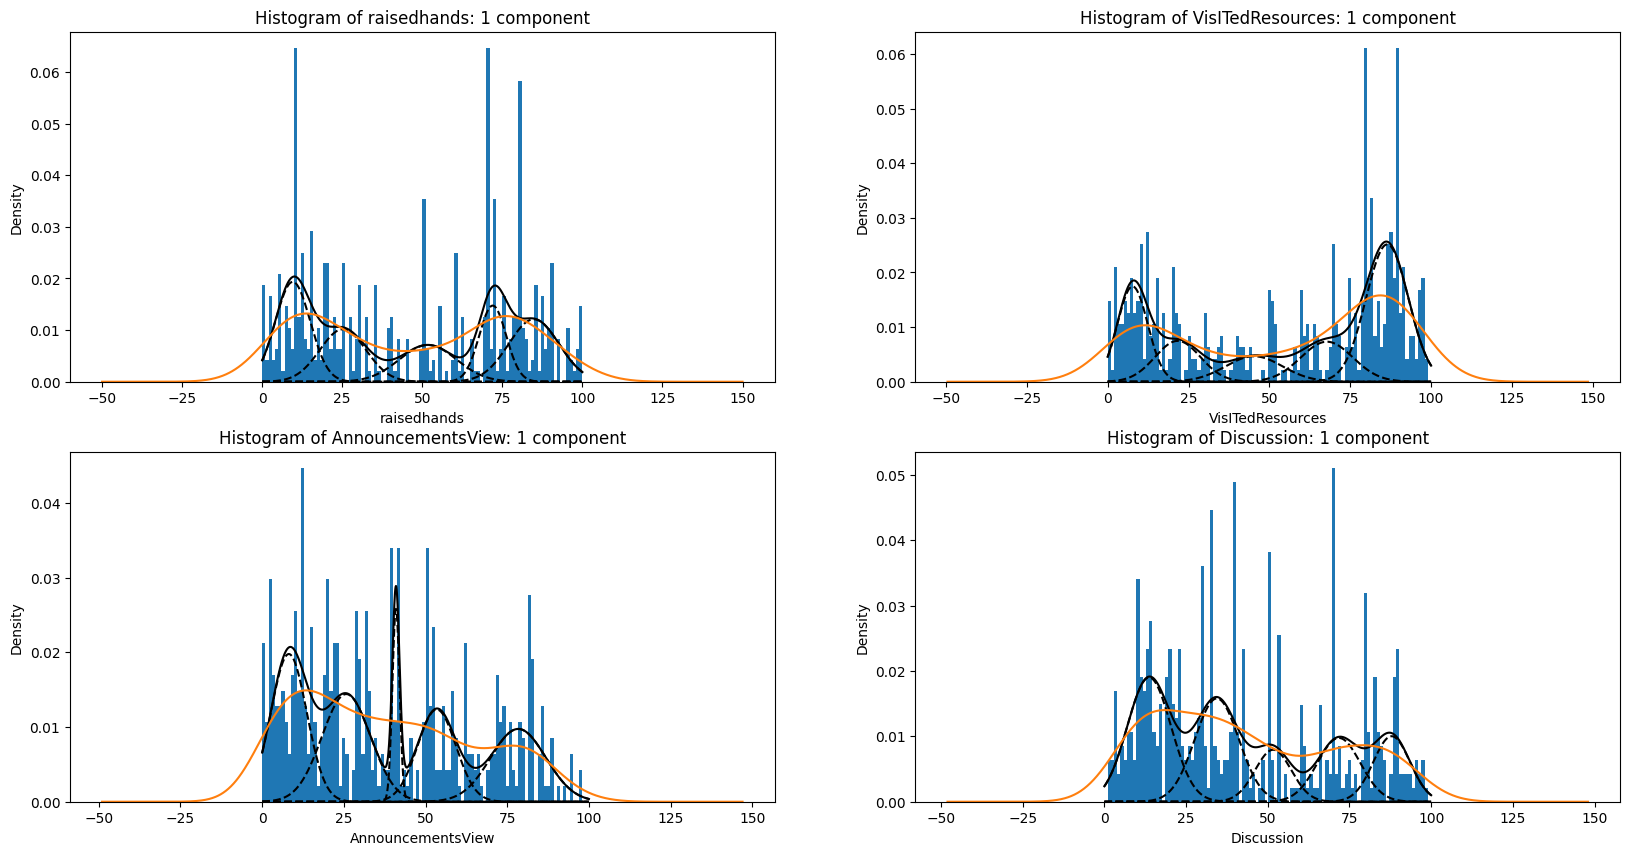

In [9]:
## estimate a GMM model on numeric data
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, covariance_type='full')
gmm.fit(data_numeric[['raisedhands']])
# plot the probability density functions of the GMM model with the histogram of the data
x = np.linspace(0, 100, 1000)
logprob = gmm.score_samples(x.reshape(-1, 1))
responsibilities = gmm.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]
# plt.figure(figsize=(20, 10))
# plt.hist(data_numeric['raisedhands'], 100, density=True)
# plt.plot(x, pdf, '-k')
# plt.plot(x, pdf_individual, '--k')
# plt.xlabel('raisedhands')
# plt.ylabel('Probability')
# plt.title('Histogram of raisedhands: 1 component')
# plt.show()


# do the above for all numeric data
gmms = []
for column in data_numeric.columns:
    gmm = GaussianMixture(n_components=5, covariance_type='full')
    gmm.fit(data_numeric[[column]])
    gmms.append(gmm)

# plot the probability density functions of the GMM model with the histogram of the data as subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for i, column in enumerate(data_numeric.columns):
    x = np.linspace(0, 100, 1000)
    logprob = gmms[i].score_samples(x.reshape(-1, 1))
    responsibilities = gmms[i].predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    axs[i//2, i%2].hist(data_numeric[column], 100, density=True)
    axs[i//2, i%2].plot(x, pdf, '-k')
    axs[i//2, i%2].plot(x, pdf_individual, '--k')
    axs[i//2, i%2].set_xlabel(column)
    axs[i//2, i%2].set_ylabel('Probability')
    # plot original probability density function kind='density'
    data_numeric[column].plot(kind='density', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Histogram of {}: 1 component'.format(column))
plt.show()

In [10]:
# convert categorical data to frequency values
data_categorical = data_categorical.apply(lambda x: x.value_counts())
# data_categorical

# create expected value contingency table
expected = pd.DataFrame()
for column in data_categorical.columns:
    expected[column] = data_categorical[column] / data_categorical[column].sum()
expected


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,0.364583,0.358333,0.366667,0.068750,0.100000,0.589583,0.050000,0.510417,0.589583,0.5625,0.391667,0.602083,0.439583
1,0.635417,0.035417,0.039583,0.516667,0.066667,0.347917,0.052083,0.489583,0.410417,0.4375,0.608333,0.397917,0.295833
2,NaN,0.012500,0.012500,0.414583,0.006250,0.062500,0.062500,NaN,NaN,NaN,NaN,NaN,0.264583
3,NaN,0.002083,0.002083,NaN,0.241667,NaN,0.043750,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.012500,0.012500,NaN,0.027083,NaN,0.106250,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.018750,0.018750,NaN,0.008333,NaN,0.045833,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.014583,0.012500,NaN,0.306250,NaN,0.135417,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.022917,0.033333,NaN,0.210417,NaN,0.093750,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.008333,0.008333,NaN,0.022917,NaN,0.050000,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.012500,0.033333,NaN,0.010417,NaN,0.039583,NaN,NaN,NaN,NaN,NaN,NaN


chi2:  0.0
p:  1.0
dof:  1
ex:  [[0.5 0.5]
 [0.5 0.5]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]

chi2:  6.000000000000001
p:  0.19914827347145564
dof:  4
ex:  [[0.33333333 0.3333333

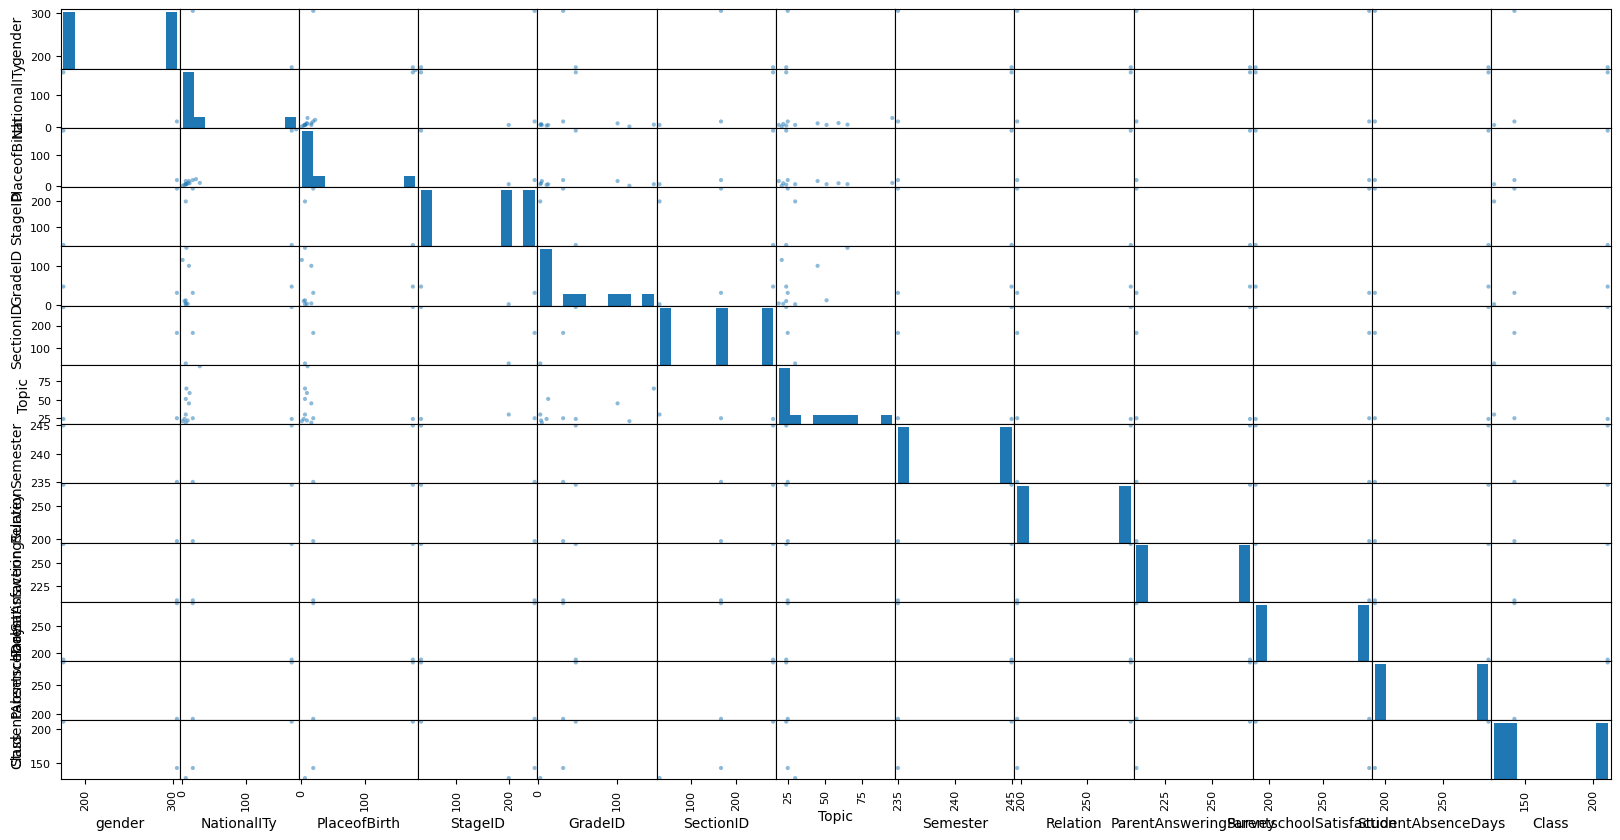

In [11]:
## chi-square test of independence for correlation between categorical data
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = data_categorical.copy()

# calculate chi2 for each column
for column in df.columns:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['Class'], df[column]))
    print('chi2: ', chi2)
    print('p: ', p)
    print('dof: ', dof)
    print('ex: ', ex)
    print('')

# plot scatter matrix
pd.plotting.scatter_matrix(data_categorical, figsize=(20, 10))
plt.show()


In [12]:
# do a normality check on the data
from scipy.stats import normaltest

for column in data_numeric.columns:
    stat, p = normaltest(data_numeric[column])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
    print('')


Statistics=4423.427, p=0.000
Probably not Gaussian

Statistics=4721.113, p=0.000
Probably not Gaussian

Statistics=109.707, p=0.000
Probably not Gaussian

Statistics=198.798, p=0.000
Probably not Gaussian



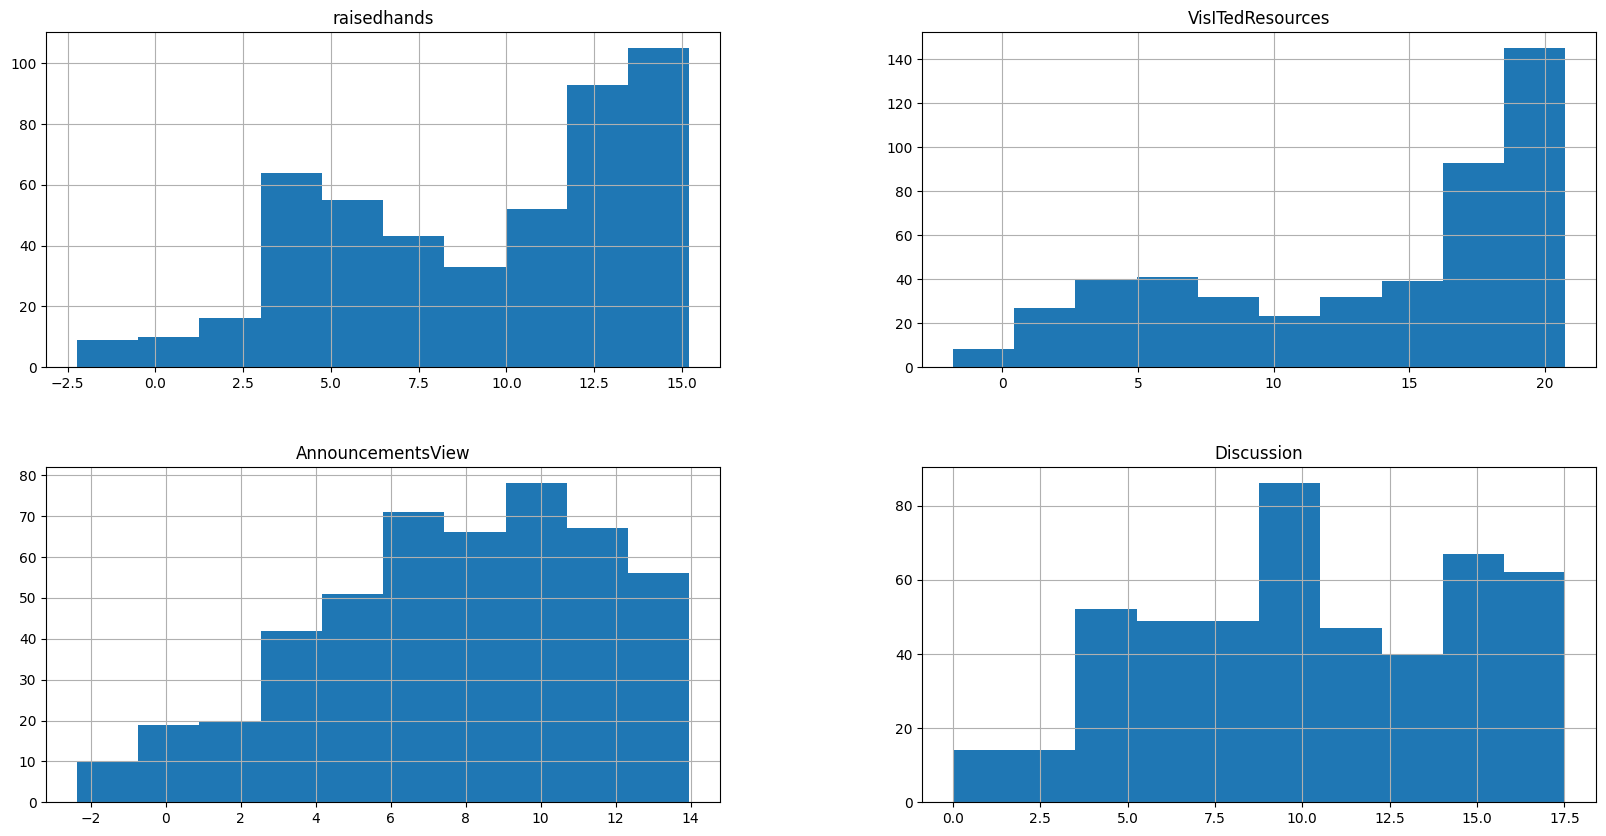

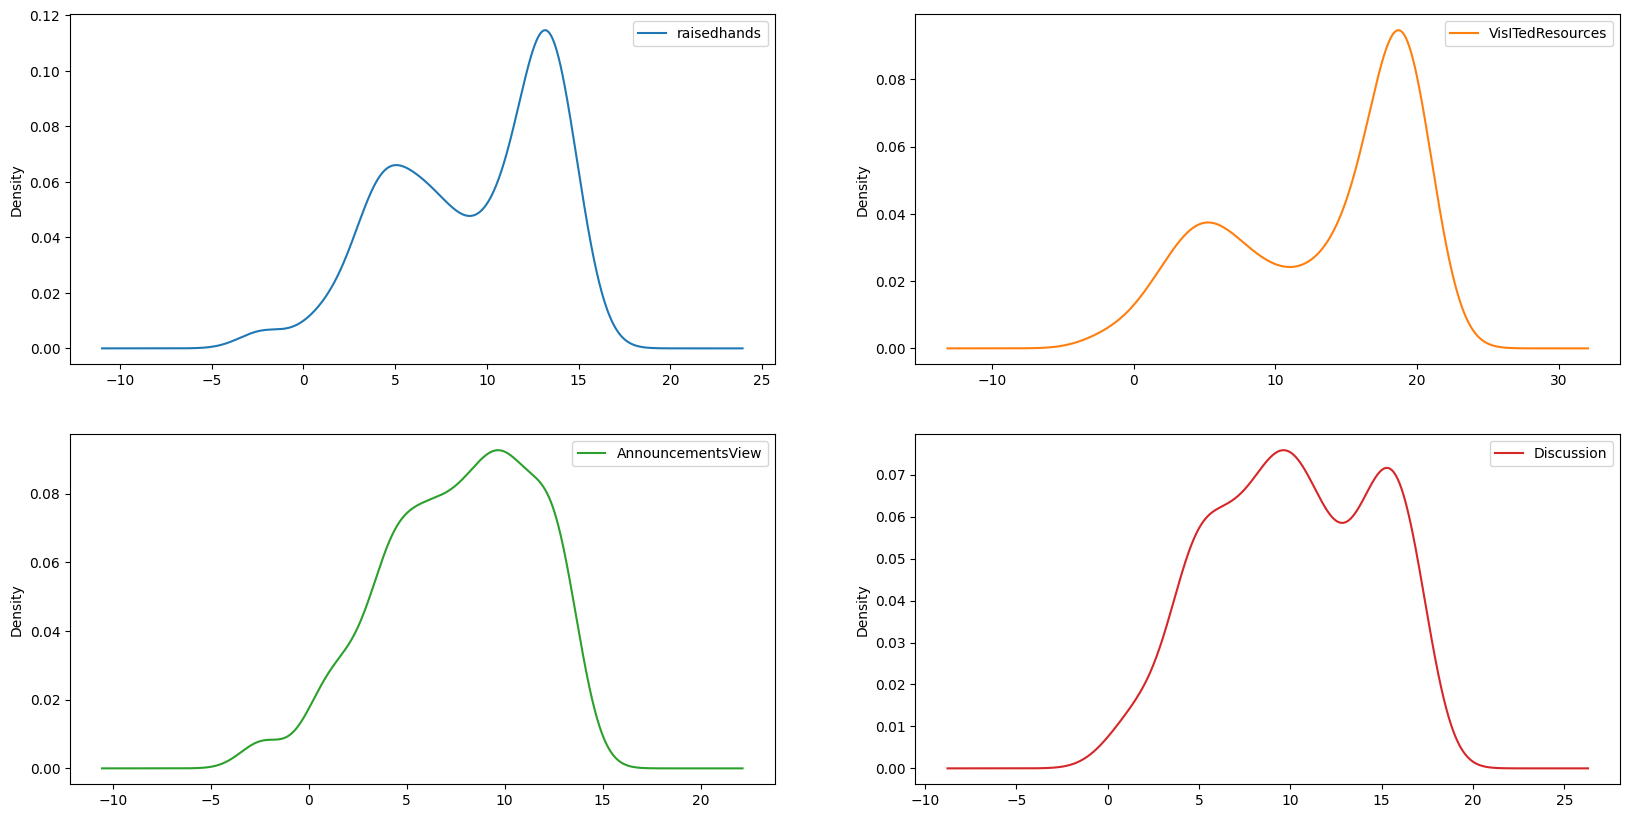

In [13]:
# box cox transform data
from scipy.stats import boxcox
 
normal_data = data_numeric.copy() + 1e-6
for column in normal_data.columns:
    normal_data[column], _ = boxcox(normal_data[column])
normal_data.head()

# plot histogram of numeric data
normal_data.hist(figsize=(20, 10))
plt.show()

# extimate a probability density function
normal_data.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20, 10))
plt.show()

/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/home/gaurav/miniconda3/envs/brsm/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


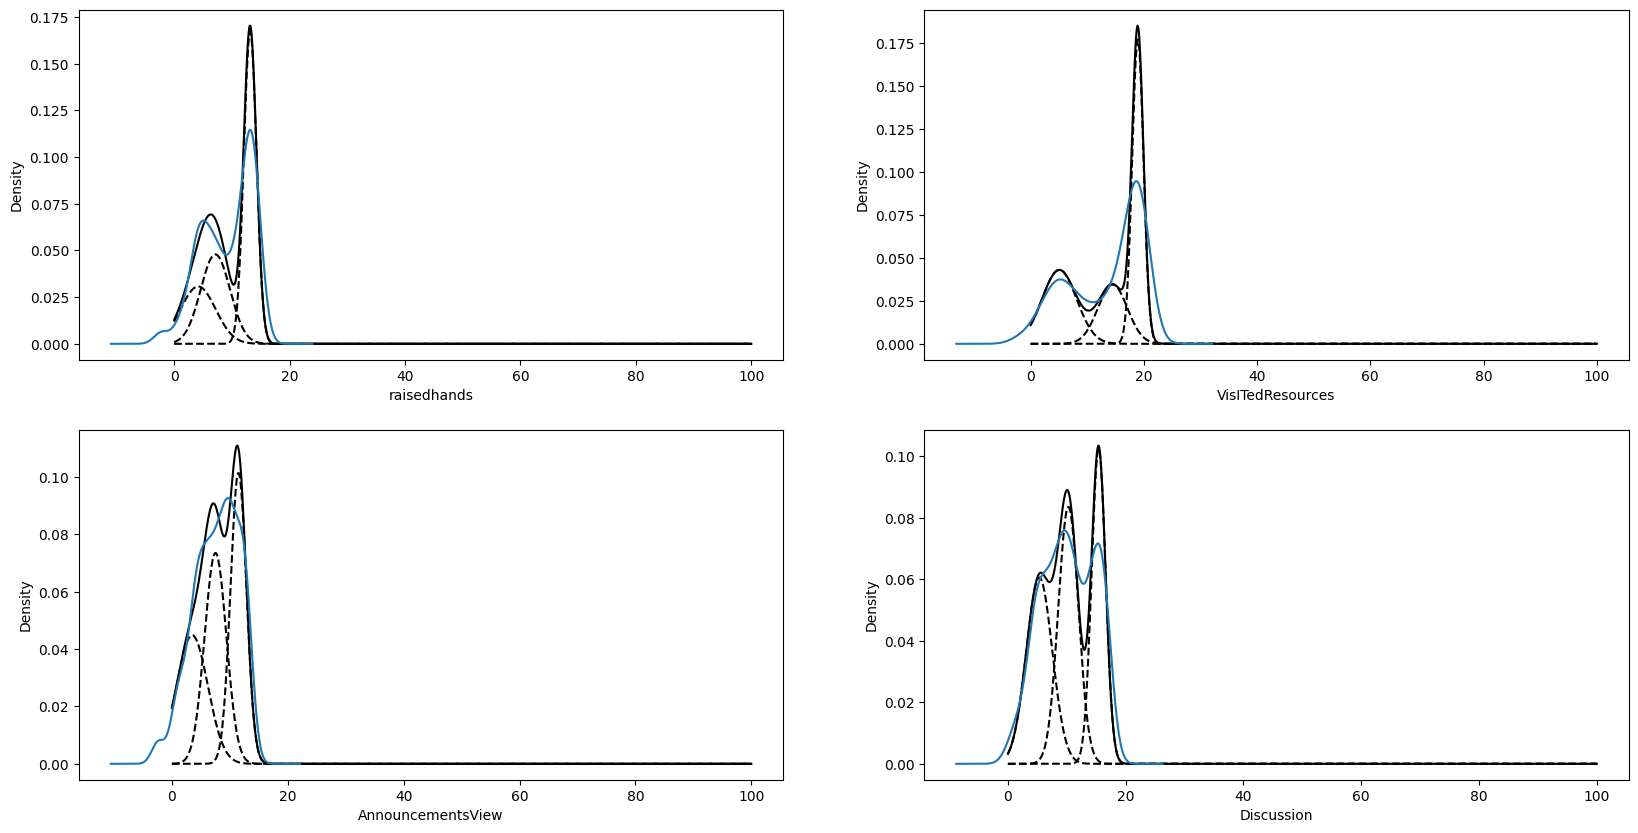

In [14]:
# fit GMM to transformed data
gmms = []
for column in normal_data.columns:
    gmm = GaussianMixture(n_components=3, covariance_type='full')
    gmm.fit(normal_data[[column]])
    gmms.append(gmm)

# plot the probability density functions of the GMM model with the histogram of the data as subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
for i, column in enumerate(normal_data.columns):
    x = np.linspace(0, 100, 1000)
    logprob = gmms[i].score_samples(x.reshape(-1, 1))
    responsibilities = gmms[i].predict_proba(x.reshape(-1, 1))
    pdf = np.exp(logprob)
    pdf_individual = responsibilities * pdf[:, np.newaxis]
    # axs[i//2, i%2].hist(data_numeric[column], 100, density=True)
    axs[i//2, i%2].plot(x, pdf, '-k')
    axs[i//2, i%2].plot(x, pdf_individual, '--k')
    axs[i//2, i%2].set_xlabel(column)
    axs[i//2, i%2].set_ylabel('Probability')
    # plot original probability density function kind='density'
    normal_data[column].plot(kind='density', ax=axs[i//2, i%2])
    # axs[i//2, i%2].set_title('Histogram of {}: 1 component'.format(column))
plt.show()


In [15]:
data_numeric

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50
...,...,...,...,...
475,5,4,5,8
476,50,77,14,28
477,55,74,25,29
478,30,17,14,57


In [16]:
# logisitic regression on the data
data_logistic = data_numeric.copy()
data_logistic['Class'] = data['Class']
data_logistic

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M
...,...,...,...,...,...
475,5,4,5,8,L
476,50,77,14,28,M
477,55,74,25,29,M
478,30,17,14,57,L


In [17]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

X = data_logistic.drop('Class', axis=1)
# convert class to numeric
y = data_logistic['Class'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# show data distribution
print(y_train.value_counts())
print(y_test.value_counts())

Class
1    163
2    120
0    101
Name: count, dtype: int64
Class
1    48
0    26
2    22
Name: count, dtype: int64


In [18]:
# perform logistic regression on the data
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

# show accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6145833333333334


LR: 0.625169 (0.046603)
LDA: 0.619973 (0.061178)
QDA: 0.601889 (0.053032)
KNN: 0.653779 (0.073910)
CART: 0.593995 (0.071852)
NB: 0.622672 (0.066366)
SVM: 0.437517 (0.025320)
RF: 0.661943 (0.051366)


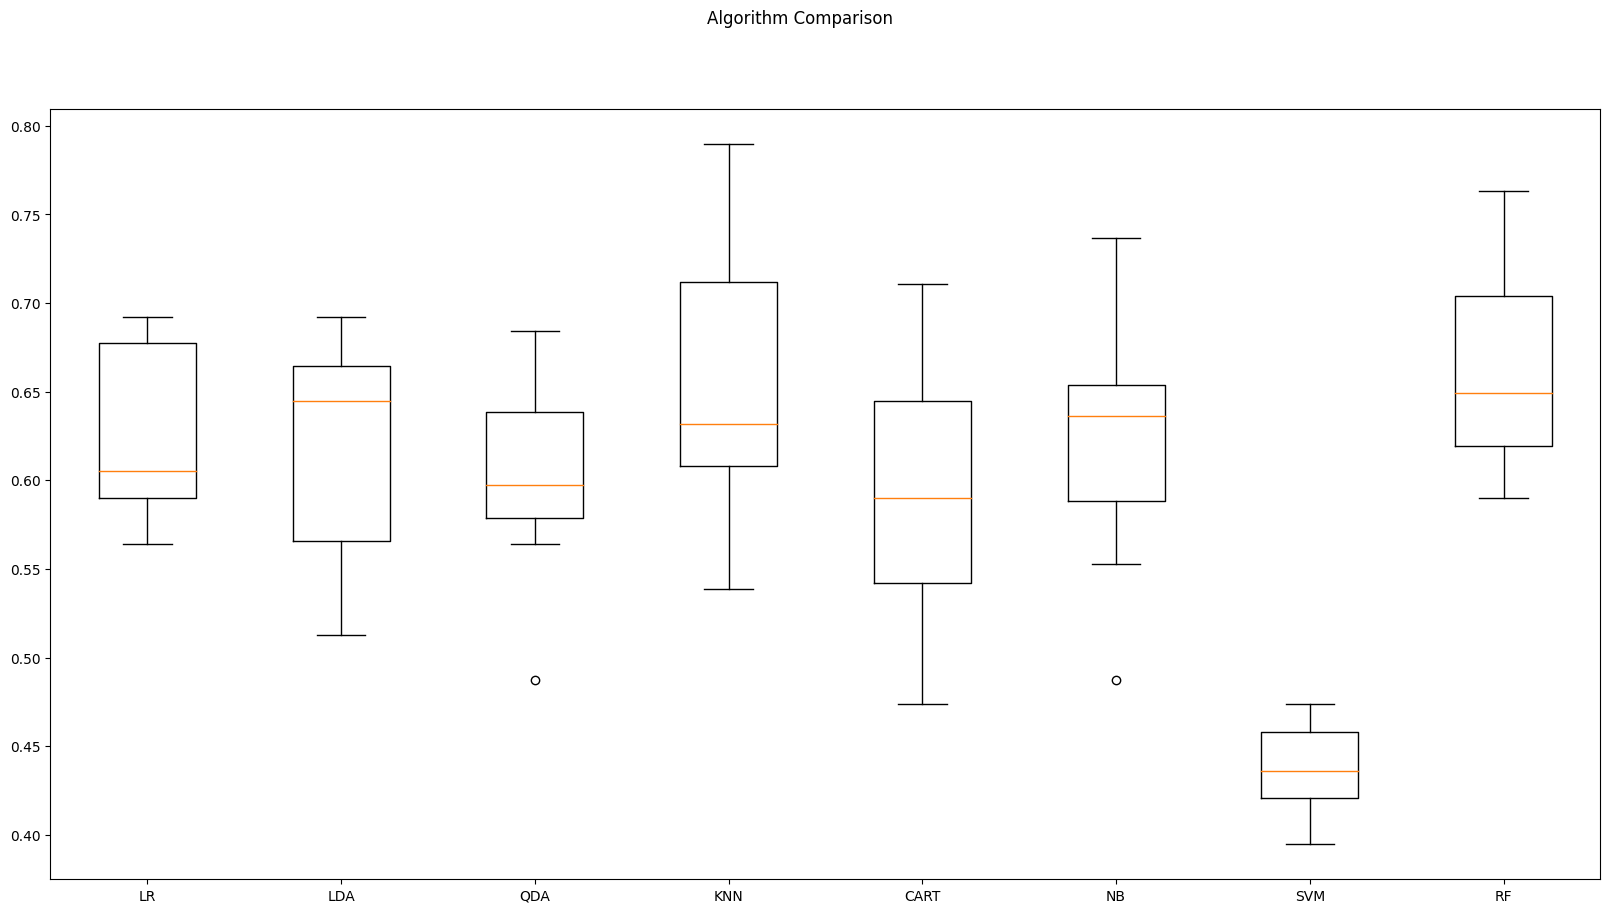

In [19]:
# run multiple multi class classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

# evaluate each model in turn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# compare algorithms
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


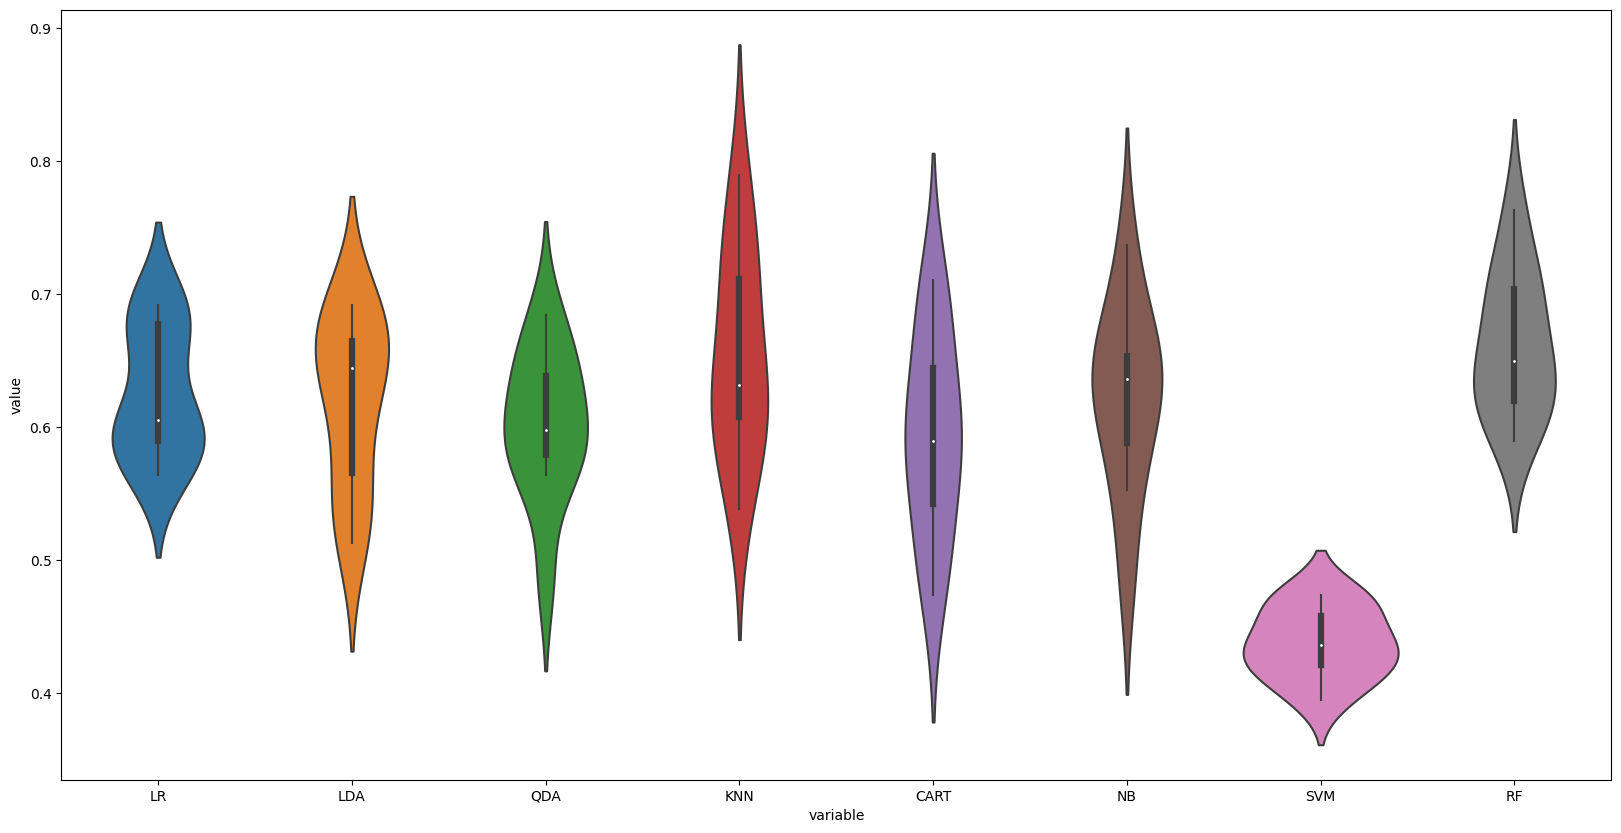

In [20]:
# compare algorithms with violin plot using sns
import seaborn as sns

df = pd.DataFrame(results).T
df.columns = names
df = pd.melt(df, value_vars=names)
fig = plt.figure(figsize=(20, 10))
sns.violinplot(x='variable', y='value', data=df)
plt.show()


In [46]:
# use categorical data for classification
df_categorical_logistic = df_categorical.copy()
df_categorical_logistic['Class'] = data['Class']
df_categorical

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,13,13,2,0,0,11,0,0,0,1,0,0
1,1,13,13,2,0,0,11,0,0,0,1,0,0
2,1,13,13,2,0,0,11,0,0,1,0,1,2
3,1,13,13,2,0,0,11,0,0,1,0,1,2
4,1,13,13,2,0,0,11,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,1,3,0,8,1,0,1,0,1,2
476,0,0,0,1,3,0,0,0,0,1,0,0,0
477,0,0,0,1,3,0,0,1,0,1,0,0,0
478,0,0,0,1,3,0,9,0,0,1,0,1,2


Class
1    163
2    120
0    101
Name: count, dtype: int64
Class
1    48
0    26
2    22
Name: count, dtype: int64
LR: 0.698043 (0.072899)
LDA: 0.677260 (0.064840)
QDA: 0.643320 (0.084469)
KNN: 0.539204 (0.062910)
CART: 0.660864 (0.080081)
NB: 0.656815 (0.074988)
SVM: 0.583333 (0.058095)
RF: 0.682321 (0.059149)


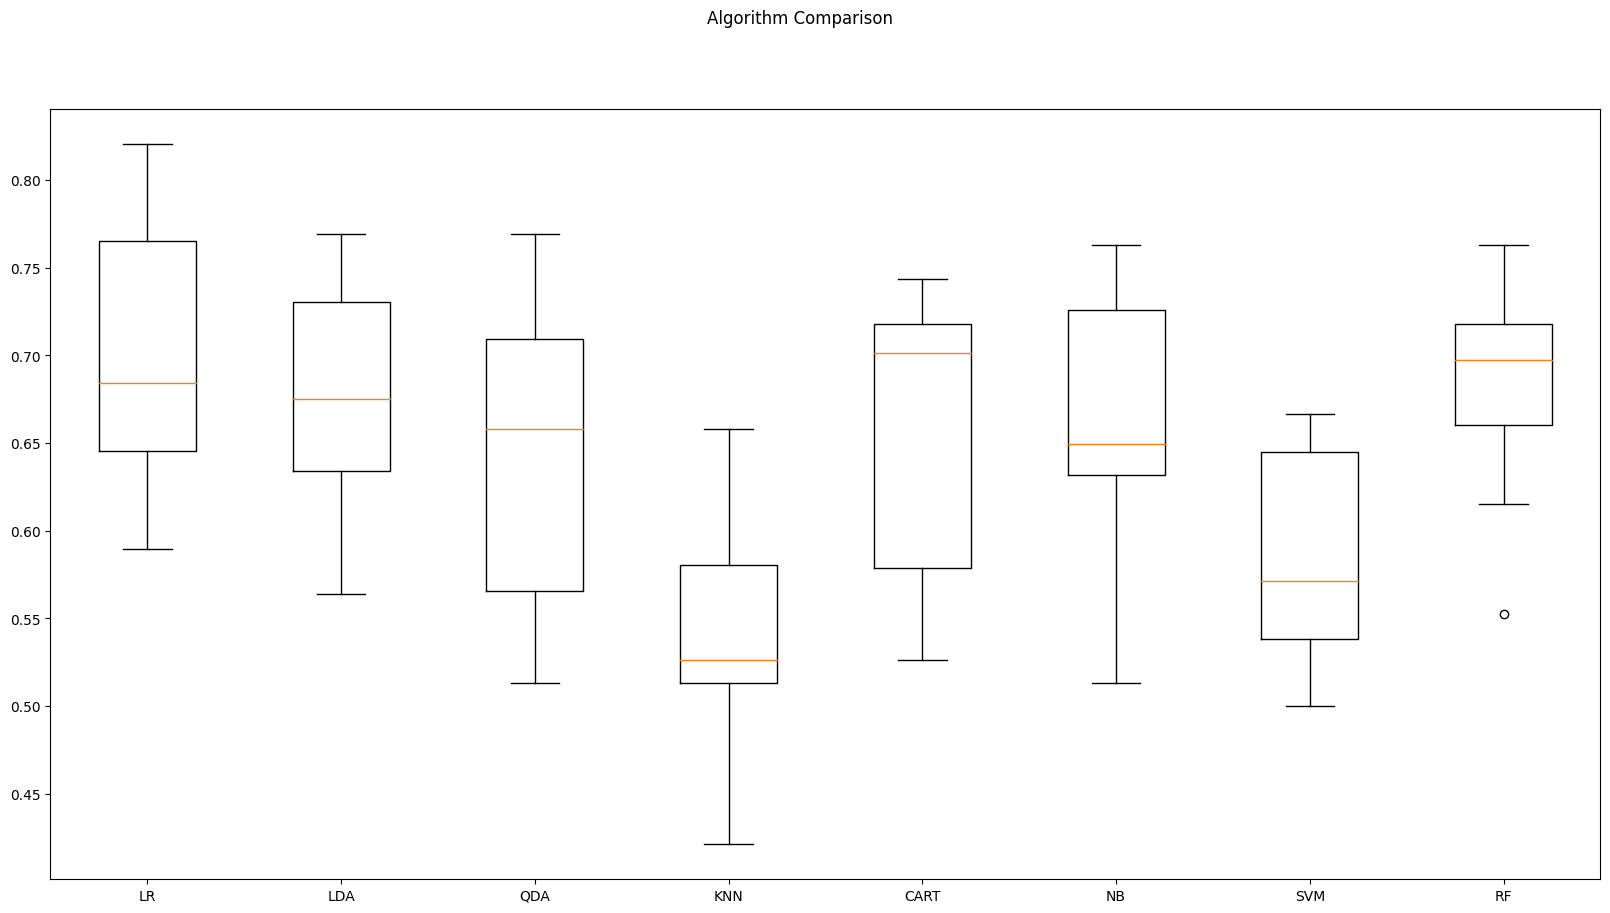

In [47]:

# split data into train and test sets
from sklearn.model_selection import train_test_split

X = df_categorical_logistic.drop('Class', axis=1)
# convert class to numeric
y = df_categorical_logistic['Class'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# show data distribution
print(y_train.value_counts())
print(y_test.value_counts())

# run multiple multi class classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))

# evaluate each model in turn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# compare algorithms
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

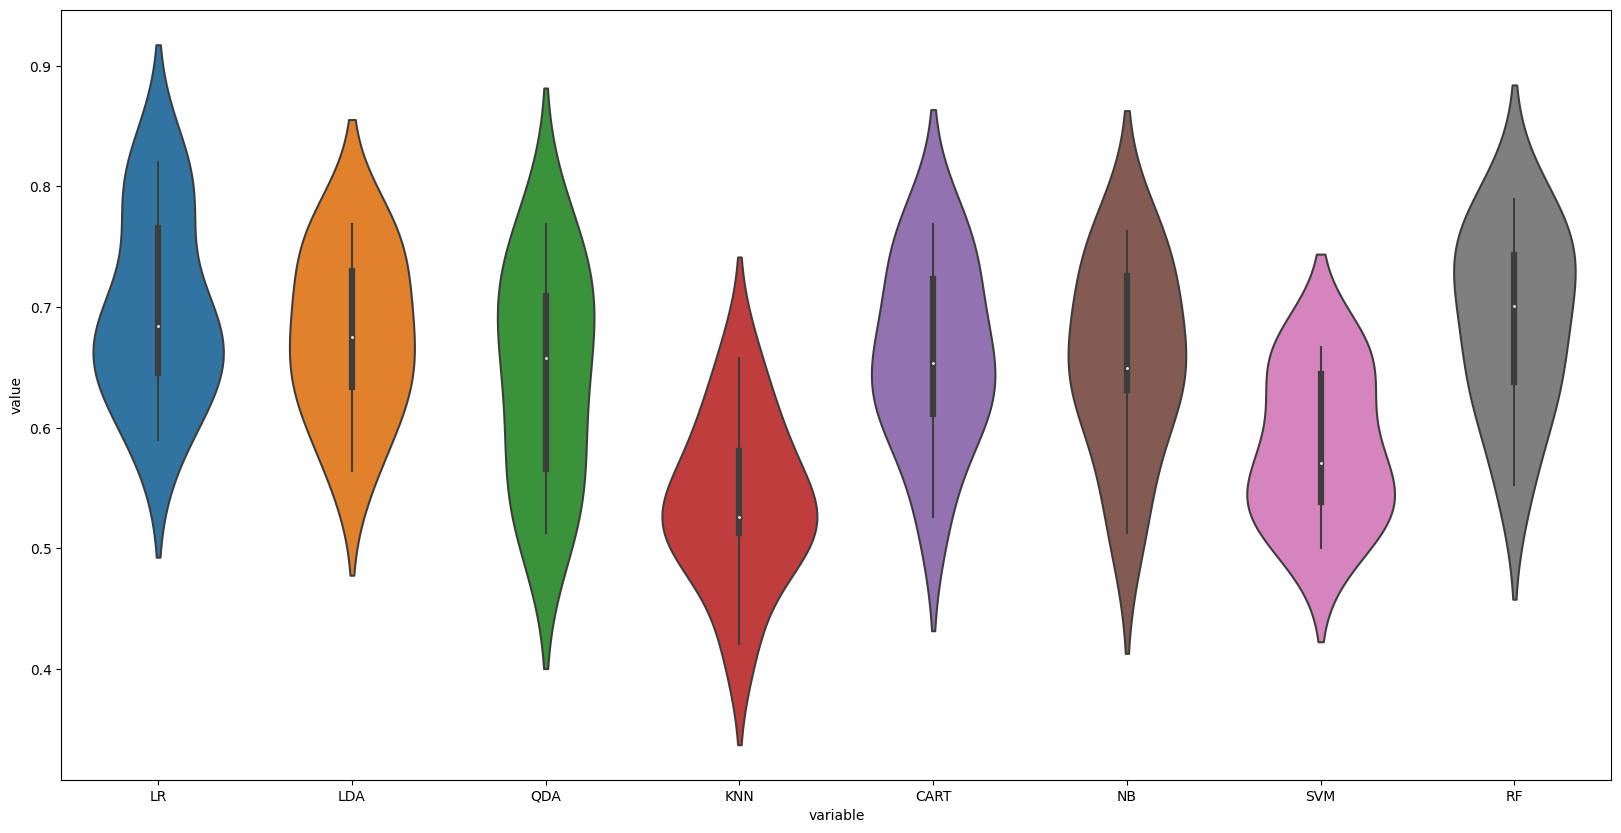

In [23]:
# compare algorithms with violin plot using sns
import seaborn as sns

df = pd.DataFrame(results).T
df.columns = names
df = pd.melt(df, value_vars=names)
fig = plt.figure(figsize=(20, 10))
sns.violinplot(x='variable', y='value', data=df)
plt.show()


In [53]:
# use categorical data for classification
df_categorical_logistic = df_categorical.copy()
df_categorical_logistic['Class'] = data['Class']
df_categorical

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,13,13,2,0,0,11,0,0,0,1,0,0
1,1,13,13,2,0,0,11,0,0,0,1,0,0
2,1,13,13,2,0,0,11,0,0,1,0,1,2
3,1,13,13,2,0,0,11,0,0,1,0,1,2
4,1,13,13,2,0,0,11,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,1,3,0,8,1,0,1,0,1,2
476,0,0,0,1,3,0,0,0,0,1,0,0,0
477,0,0,0,1,3,0,0,1,0,1,0,0,0
478,0,0,0,1,3,0,9,0,0,1,0,1,2


In [54]:
# do logistic regression on all data and get r2 score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

logistic = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
X = df_categorical_logistic.drop('Class', axis=1)
y = df_categorical_logistic['Class'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)

# get train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# fit model
logistic.fit(X_train, y_train)

# predict
y_pred = logistic.predict(X_test)

# get r2 score
print('R2 score: ', r2_score(y_test, y_pred))


R2 score:  0.39949958298582144


In [56]:
df_satis = data[numerical_colums].copy()
df_satis['Class'] = data['Class']
df_satis

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
0,15,16,2,20,M
1,20,20,3,25,M
2,10,7,0,30,L
3,30,25,5,35,L
4,40,50,12,50,M
...,...,...,...,...,...
475,5,4,5,8,L
476,50,77,14,28,M
477,55,74,25,29,M
478,30,17,14,57,L


In [57]:
# do logistic regression on all data and get r2 score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

logistic = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
X = df_satis.drop('Class', axis=1)
y = df_satis['Class'].apply(lambda x: 0 if x == 'L' else 1 if x == 'M' else 2)

# get train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# fit model
logistic.fit(X_train, y_train)

# predict
y_pred = logistic.predict(X_test)

# get r2 score
print('R2 score: ', r2_score(y_test, y_pred))

R2 score:  0.039199332777314355


In [24]:
new_numerical_columns = numerical_colums + [ 'StudentAbsenceDays']
df_satis = data[new_numerical_columns]
# convert gradeid and studentabsencedays to numeric
# df_satis['GradeID'] = df_satis['GradeID'].apply(lambda x: 0 if x == 'G-01' else 1 if x == 'G-02' else 2 if x == 'G-03' else 3 if x == 'G-04' else 4 if x == 'G-05' else 5 if x == 'G-06' else 6 if x == 'G-07' else 7 if x == 'G-08' else 8 if x == 'G-09' else 9 if x == 'G-10' else 10 if x == 'G-11' else 11 if x == 'G-12' else 12)
df_satis['StudentAbsenceDays'] = df_satis['StudentAbsenceDays'].apply(lambda x: 0 if x == 'Under-7' else 1 if x == 'Above-7' else 2)
df_satis.head()
# data.head()

/tmp/ipykernel_4466/3833820106.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_satis['StudentAbsenceDays'] = df_satis['StudentAbsenceDays'].apply(lambda x: 0 if x == 'Under-7' else 1 if x == 'Above-7' else 2)


,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,15,16,2,20,0
1,20,20,3,25,0
2,10,7,0,30,1
3,30,25,5,35,1
4,40,50,12,50,1


In [25]:
# add parent satisfaction column from data
df_satis['ParentschoolSatisfaction'] = data['ParentschoolSatisfaction']
# convert parent satisfaction to numeric
df_satis['ParentschoolSatisfaction'] = df_satis['ParentschoolSatisfaction'].apply(lambda x: 0 if x == 'Bad' else 1 if x == 'Good' else 2)
df_satis.head()

/tmp/ipykernel_4466/1498784710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_satis['ParentschoolSatisfaction'] = data['ParentschoolSatisfaction']
/tmp/ipykernel_4466/1498784710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_satis['ParentschoolSatisfaction'] = df_satis['ParentschoolSatisfaction'].apply(lambda x: 0 if x == 'Bad' else 1 if x == 'Good' else 2)


,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,ParentschoolSatisfaction
0,15,16,2,20,0,1
1,20,20,3,25,0,1
2,10,7,0,30,1,0
3,30,25,5,35,1,0
4,40,50,12,50,1,0


In [41]:
# run logistic regression on the data
from sklearn.linear_model import LogisticRegression

X = df_satis.drop('ParentschoolSatisfaction', axis=1)
y = df_satis['ParentschoolSatisfaction']

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

# get multiple correlation coefficient R, R^2 and adjusted R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.59375
-0.6987295825771322


In [42]:
# show percentage of parents answering good
print(data['Class'].value_counts(normalize=True))


Class
M    0.439583
H    0.295833
L    0.264583
Name: proportion, dtype: float64


In [43]:
df5_numeric.head()
# run logistic regression on the data
from sklearn.linear_model import LogisticRegression

X = df5_numeric.drop('ParentschoolSatisfaction', axis=1)
y = df5_numeric['ParentschoolSatisfaction']

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

# get multiple correlation coefficient R, R^2 and adjusted R^2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)




0.7291666666666666
-0.1324863883847549


In [29]:
# remove one column one by one and check accuracy in logistic regression
for col in df5_numeric.columns:
    if col == 'ParentschoolSatisfaction':
        continue
    X = df5_numeric.drop(col, axis=1).drop('ParentschoolSatisfaction', axis=1)
    y = df5_numeric['ParentschoolSatisfaction']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(col, accuracy_score(y_test, y_pred))

gender 0.7395833333333334
NationalITy 0.7083333333333334
PlaceofBirth 0.7083333333333334
StageID 0.7291666666666666
GradeID 0.7291666666666666
SectionID 0.75
Topic 0.7291666666666666
Semester 0.71875
Relation 0.7291666666666666
raisedhands 0.7291666666666666
VisITedResources 0.7395833333333334
AnnouncementsView 0.71875
Discussion 0.71875
ParentAnsweringSurvey 0.6666666666666666
StudentAbsenceDays 0.7395833333333334
Class 0.7291666666666666


### Factor analysis

In [30]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


In [31]:
df= pd.read_csv("./xAPI-Edu-Data.csv")

In [32]:
# convert categorical data to numeric

df_numeric,_ = convert_text_to_numeric(df)
df_numeric.head()

{'F', 'M'}
{'Jordan', 'lebanon', 'Lybia', 'venzuela', 'Iran', 'Egypt', 'Syria', 'SaudiArabia', 'Morocco', 'USA', 'Tunis', 'Palestine', 'Iraq', 'KW'}
{'Jordan', 'lebanon', 'Lybia', 'venzuela', 'Iran', 'Egypt', 'Syria', 'SaudiArabia', 'Morocco', 'USA', 'Tunis', 'Palestine', 'Iraq', 'KuwaIT'}
{'HighSchool', 'MiddleSchool', 'lowerlevel'}
{'G-04', 'G-06', 'G-05', 'G-08', 'G-11', 'G-10', 'G-02', 'G-07', 'G-12', 'G-09'}
{'A', 'B', 'C'}
{'Geology', 'Spanish', 'Biology', 'Math', 'Science', 'Quran', 'French', 'English', 'Chemistry', 'History', 'Arabic', 'IT'}
{'F', 'S'}
{'Father', 'Mum'}
{'Yes', 'No'}
{'Bad', 'Good'}
{'Under-7', 'Above-7'}
{'M', 'H', 'L'}


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,13,13,2,0,0,11,0,0,15,16,2,20,0,1,0,0
1,1,13,13,2,0,0,11,0,0,20,20,3,25,0,1,0,0
2,1,13,13,2,0,0,11,0,0,10,7,0,30,1,0,1,2
3,1,13,13,2,0,0,11,0,0,30,25,5,35,1,0,1,2
4,1,13,13,2,0,0,11,0,0,40,50,12,50,1,0,1,0


In [33]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_numeric)
chi_square_value, p_value

(2711.396181014556, 0.0)

In [34]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_numeric)

In [35]:
kmo_model

0.7373076236782444

In [63]:
# Create factor analysis object and perform factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()
fa.fit(df_numeric)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

fa.loadings_


array([[-0.22843433,  0.15748344, -0.06393185],
       [ 0.09980647,  0.89660384,  0.28792001],
       [ 0.01629258,  0.89847279,  0.24226966],
       [-0.02616521, -0.21785332,  0.30604364],
       [ 0.06171308,  0.09192716,  0.3260076 ],
       [ 0.03534601,  0.05224855,  0.26922704],
       [-0.00500335,  0.1362603 ,  0.45741639],
       [-0.02232814, -0.05515898, -0.38295858],
       [ 0.36236193, -0.28099341, -0.05903217],
       [ 0.62039416,  0.05371915, -0.35039939],
       [ 0.73732696, -0.08937057, -0.15507488],
       [ 0.51549082,  0.01828041, -0.46516337],
       [ 0.29276317,  0.19115374, -0.18769904],
       [-0.65695181, -0.09583258, -0.17887554],
       [ 0.63503345, -0.08129326,  0.25880952],
       [-0.58761668, -0.08325079, -0.01294658],
       [-0.45869507, -0.01194707,  0.06547394]])

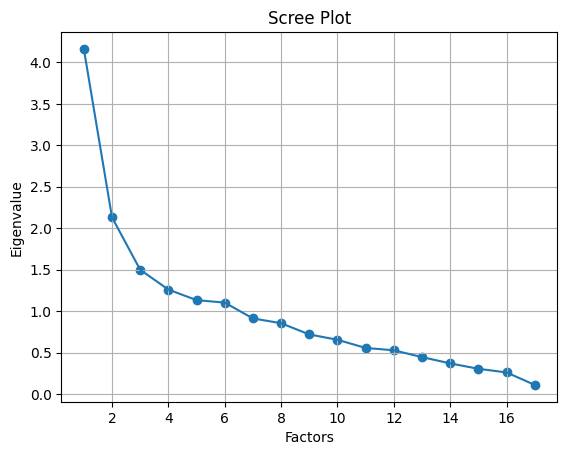

In [60]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_numeric.shape[1]+1),ev)
plt.plot(range(1,df_numeric.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [61]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=df.columns)
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
                          Factor 1  Factor 2  Factor 3
gender                   -0.228434  0.157483 -0.063932
NationalITy               0.099806  0.896604  0.287920
PlaceofBirth              0.016293  0.898473  0.242270
StageID                  -0.026165 -0.217853  0.306044
GradeID                   0.061713  0.091927  0.326008
SectionID                 0.035346  0.052249  0.269227
Topic                    -0.005003  0.136260  0.457416
Semester                 -0.022328 -0.055159 -0.382959
Relation                  0.362362 -0.280993 -0.059032
raisedhands               0.620394  0.053719 -0.350399
VisITedResources          0.737327 -0.089371 -0.155075
AnnouncementsView         0.515491  0.018280 -0.465163
Discussion                0.292763  0.191154 -0.187699
ParentAnsweringSurvey    -0.656952 -0.095833 -0.178876
ParentschoolSatisfaction  0.635033 -0.081293  0.258810
StudentAbsenceDays       -0.587617 -0.083251 -0.012947
Class                    -0.458695 -0.011947  0.

In [64]:
# calculate explained variance
fa.get_factor_variance()

(array([2.87050994, 1.86577278, 1.27934762]),
 array([0.16885353, 0.10975134, 0.07525574]),
 array([0.16885353, 0.27860487, 0.35386061]))

In [65]:
# calculate communalities
communalities = fa.get_communalities()
communalities

array([0.08107056, 0.8967577 , 0.8662134 , 0.1418074 , 0.11854006,
       0.07646245, 0.22782166, 0.15019833, 0.21374826, 0.5105544 ,
       0.57568636, 0.48244192, 0.15748096, 0.47276602, 0.47685844,
       0.35239167, 0.21483074])